## **演示0502：最小二乘法**

### **单变量线性拟合**
* 假设平面上有若干个数据点$(x_i, y_i)$，其中$i=1,2,\cdots,n$。$x$作为唯一的自变量，$y$作为因变量。作一条曲线，使得**各数据点到该曲线的距离最近**：

![](../images/050201.png)

* 如何定义**各数据点到该曲线的距离最近**
 * 首先定义残差概念如下：$r_i=h(x_i )-y_i$，其中$h(x_i )$代表拟合后的曲线函数在第$i$个数据点$x_i$处的计算结果
 * 根据范数的定义，可知：
   * 正无穷范数(残差绝对值的最大值)：$ F(+\infty)=max(|r_i|)$
   * 1范数(残差绝对值之和)：$F(1)=\sum_i^n|r_i |$
   * 2范数(残差平方和)：$ F(2)=\sum_i^n r_i^2 $
 * 一般使用2范数的大小来判断**各数据点到该曲线的距离最近**，这种方法就称为最小二乘法(Least Square Method)
* 拟合曲线的类型
 * 可以使用直线、二次曲线、高阶曲线等进行拟合
 * 无论哪种曲线，都可以表示成：$ h(x)= w_0+w_1 x+ w_2 x^2+\cdots+w_m x^m $，其中，$m$指定了拟合曲线的最大阶数
 * 最小二乘法的目标，就是要找到向量$w=(w_0,w_1,\cdots,w_m )$，使得针对所有的数据点，残差的2范数最小
 * 当$m=1$时，拟合结果就是一条直线

### **案例1：一元(单变量)数据点集线性拟合**
已知二维平面上若干数据点坐标$(x_i, y_i)$如下：(6, 7), (8, 9), (10, 13), (14, 17.5), (18, 18)  
拟合出一条直线：$ y = w_1 x + w_0 $，使用最小二乘法计算出最优的权重系数(参数)$w_1$和$w_0$

> **步骤1：查看数据点的图像**

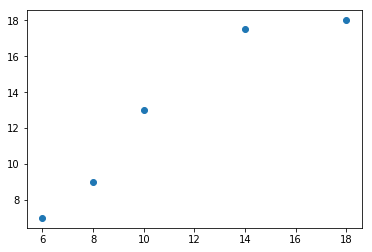

In [14]:
''' 查看数据点图像 '''

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([6, 8, 10, 14, 18])
y = np.array([7, 9, 13, 17.5, 18])

plt.scatter(x, y)
plt.show()

> **步骤2-方法1：使用协方差-方差公式进行直线拟合**  
>  
已知要拟合的目标函数：$ F(w_0,w_1 )=\sum_i^n (w_0+w_1 x_i-y_i)^2 $，则使$F$最小的$w_0$和$w_1$可通过下列方式计算：  
$ \left\{\begin{array}{lcr}
w_0 = \bar y - w_1 \bar x \\ \\
w_1 = \dfrac{cov(x, y)}{var(x)}
\end{array}\right. $  
其中，$ cov(x, y) $是数组$x$,$y$的协方差，$var(x)$是数组$x$的方差  
**使用协方差-方差公式进行直线拟合的推导过程：**
* 要计算函数$F$的极值，可以采用求一阶偏导，并使之为0：  
$ \left\{\begin{array}{lcr}
\dfrac{\partial F}{\partial w_0} = 2 \sum_i^n (w_0+w_1 x_i-y_i) = 0 \\ \\
\dfrac{\partial F}{\partial w_1} = 2 \sum_i^n (w_0+w_1 x_i-y_i) x_i = 0
\end{array}\right. $
* 根据$\dfrac{\partial F}{\partial w_0}=0 $，可得：$w_0=\bar y - w_1 \bar x $，其中：
 * $ \bar y $：训练数据中$y$的平均值
 * $ \bar x $：训练数据中$x$的平均值
* 将$w_0=\bar y - w_1 \bar x $代入到$\dfrac{\partial F}{\partial w_1}=0 $，可得：  
$ \begin{aligned}
\dfrac{\partial F}{\partial w_1} &=\sum_{i=1}^n (\bar y - w_1 \bar x + w_1 x_i - y_i) x_i \\ \\
&=\bar y \sum{x_i} - \sum{x_i}{y_i} - w_1 (\bar x \sum{x_i} - \sum{x_i^2}) \\ \\
&=0
\end{aligned}$  
进而可得：  
$ w_1 = \dfrac{\bar y \sum{x_i} - \sum{x_i y_i}}{\bar x \sum{x_i} - \sum{x_i^2}} = \dfrac{n \bar y \bar x - \sum{x_i y_i}}{n \bar x^2 - \sum{x_i^2}} = \dfrac{\sum{x_i y_i} - n \bar x \bar y}{\sum{x_i^2} - n \bar x^2} $  
注意，上式中用到了下列事实：$ \sum{x_i} = n \bar x $  
* 引入两个重要的推论式：  
$ \sum_{i=1}^{n} (x_i - \bar x)^2=\sum{x_i^2} - n \bar x^2 $  
$ \sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y)=\sum{x_i y_i} - n \bar x \bar y $  
证明如下：  
$ \begin{aligned}
&\sum_{i=1}^{n} (x_i - \bar x)^2 \\ \\ = & (x_1 - \bar x)^2 + (x_2 - \bar x)^2 + \cdots + (x_n - \bar x)^2 \\ \\
= & (x_1^2 - 2 x_1 \bar x + \bar x^2) +
(x_2^2 - 2 x_2 \bar x + \bar x^2) + \cdots +
(x_n^2 - 2 x_n \bar x + \bar x^2) \\ \\
= & (x_1^2 + x_2^2 + \cdots + x_n^2) + n \bar x^2 - 2 \bar x (x_1 + x_2 + \cdots + x_n) \\ \\
= & \sum{x_i^2} + n \bar x^2 - 2 \bar x * n * \bar x \\ \\
= & \sum{x_i^2} - n \bar x^2
\end{aligned}$  
$\begin{aligned} \\
\begin{aligned}
&\sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y) \\ \\
= & (x_1 - \bar x)(y_1 - \bar y) + (x_2 - \bar x)(y_2 - \bar y) + \cdots + (x_n - \bar x)(y_n - \bar y) \\ \\
= & (x_1 y_1 + \bar x \bar y - x_1 \bar y - y_1 \bar x) + (x_2 y_2 + \bar x \bar y - x_2 \bar y - y_2 \bar x) + \cdots + (x_n y_n + \bar x \bar y - x_n \bar y - y_n \bar x) \\ \\
= & (x_1 y_1 + x_2 y_2 + \cdots + x_n y_n) + n \bar x \bar y - \bar y(x_1+x_2+\cdots+x_n)-\bar x(y_1 + y_2 + \cdots + y_n) \\ \\
= & \sum{x_i y_i} + n \bar x \bar y - \bar y \cdot n \cdot \bar x - \bar x \cdot n \cdot \bar y \\ \\
= & \sum{x_i y_i} - n \bar x \bar y
\end{aligned} \end{aligned}$  
* 结合上述$w_0$和$w_1$计算结果及推论式，进一步得到：  
$ \left\{\begin{array}{lcr}
w_0 = \bar y - w_1 \bar x \\ \\
w_1 = \dfrac{x_i y_i - n \bar x \bar y}{\sum{x_i^2 - n \bar x^2}} = \dfrac{\sum_{i=1}^{n}(x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^{n}(x_i - \bar x)^2}
\end{array}\right. $  
回顾协方差和方差的概念，上述结果也可以写成：  
$ \left\{\begin{array}{lcr}
w_0 = \bar y - w_1 \bar x \\ \\
w_1 = \dfrac{cov(x, y)}{var(x)}
\end{array}\right. $

w1= 0.976293103448276
w0= 1.9655172413793096


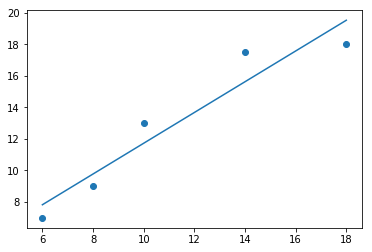

In [15]:
''' 使用方差-协方差公式拟合曲线 '''
w1 = np.cov(x, y, ddof=1)[1, 0] / np.var(x, ddof=1)
w0 = np.mean(y) - w1 * np.mean(x)

# 打印计算出来的w1和w0的值
print("w1=", w1)
print("w0=", w0)

# 使用拟合的曲线，根据x计算对应的y值
y_fit = w1 * x + w0

# 绘制样本数据点以及拟合出来的直线
plt.scatter(x, y)
plt.plot(x, y_fit)
plt.show()

> **步骤2-方法2：使用矩阵运算法求解$w_0$和$w_1$**   
>  
$W=(X^T X)^{-1} X^T y$  
上式中，$X$是$(m, n)$维度数组，$m$是样本点个数，$n$是权重系数的个数。在一元线性回归中，$n$=2。本例中$X$可视为$(5, 2)$矩阵，其中一列是$x$的坐标值，另一列补充一个全为$1$的值(从而形成扩展矩阵)，以便与向量$W$(包含$w_0$和$w_1$)进行乘积运算。  
提示：*np.linalg*包含了矩阵求逆的函数  
**关于扩展矩阵$X$：**  
* 假设有$m$个样本，每个样本包括一个$n$维度向量(多变量)和一个对应的结果值$(y)$，且$m \ge n+1$  
$ S=\left(\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1n} \\
x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \cdots & x_{mn}
\end{matrix}\right) $  
$ y=(y_1,y_2,\cdots,y_m)^T $  
需要拟合成下列线性形式：$F(x)=Sa+b$，其中，$a$是$n$维向量，$b$是标量
* 样本数据变形  
令：$ X=\left(\begin{matrix}
1 & x_{11} & x_{12} & \cdots & x_{1n} \\
1 & x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & x_{m2} & \cdots & x_{mn}
\end{matrix}\right) $  
也就是说，在S第1列插入一列全为1的列  
$ w=(w_0, w_1, w_2, \cdots, w_{n-1},w_n)^T $    
则拟合后的函数$f=Sa+b$转变成：$f(X,w)=Xw$  
全为1的列在$X$中的位置是可以调整的，只要保证与$w$中的$w_0$位置对应就行

[0.9762931  1.96551724]


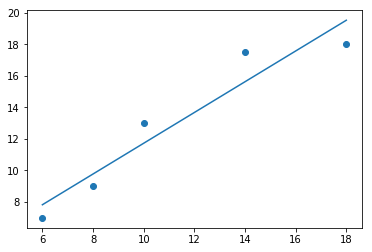

In [16]:
''' 使用扩展矩阵方法计算最优的拟合直线 '''

# 将x从一维数组转成列数组，然后扩充一列全为1的列。以方便矩阵乘积运算
X = np.c_[x[:, np.newaxis], np.ones(len(x))]

# 根据上面的矩阵运算公式计算W
W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)       
print(W)

# 使用拟合函数重新计算每个样本点的y值
y_fit = X.dot(W)         

plt.scatter(x, y)
plt.plot(x, y_fit)
plt.show()

> **步骤2-方法3：使用scipy的leastsq方法求解$w_0$和$w_1$**  
* scipy.optimize对象的leastsq用于对给定的残差序列进行最小二乘求解。  
* 在调用leastsq函数之前，必须先做好两个准备：  
  1. 定义求残差的函数。该函数的第一个参数必须是要求解的权重系数。一般来说，权重系数是一个数组（例如，在一元线性回归中，有$w_1$和$w_0$两个权重系数，它们构成一个一维数组$W$。
  2. 为权重系数提供初值。一般可以采用随机初始化的方式。再次注意，权重系数是一个数组。

[[ 6.  1.]
 [ 8.  1.]
 [10.  1.]
 [14.  1.]
 [18.  1.]]
result= (array([0.97629309, 1.9655174 ]), 1)


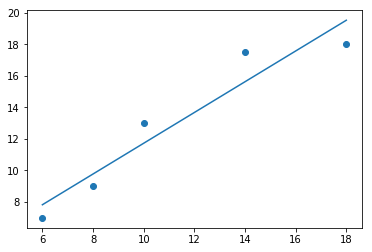

In [17]:
''' 使用leastsq方法求解线性拟合权重系数 '''

# 将x从一维数组转成列数组，然后扩充一列全为1的列。以方便矩阵乘积运算
x_ext = np.c_[x[:, np.newaxis], np.ones(len(x))]
print(x_ext)

# 定义线性拟合函数
# 注意X的维度：(5, 2)  W的维度：(2, )
def fit_function(W, X):   
    return np.dot(X, W)

# 定义残差函数
# 注意该残差函数返回一个数组，数组中的每个元素正好是对应数据点的残差
# 注意本例中X的维度：(5, 2)  W的维度：(2, )，返回值的维度：(5, )
def error_function(W, X, y):
    return fit_function(W, X) - y           # (5, )

# 给定权重系数的初始值
# 注意W的维度：(2, )
w_init = np.random.rand(2)

# 调用leastsq方法
import scipy.optimize as opt
result = opt.leastsq(error_function, w_init, args=(x_ext, y))
# 查看result的内部结构和求值结果
print("result=", result)

# result[0]中存放了W向量
W = result[0]

plt.scatter(x, y)
plt.plot(x, fit_function(W, x_ext))     
plt.show()

### **案例2：单变量(一元)高阶曲线拟合**
已知二维平面上若干数据点坐标 $(x_i,y_i)$如下：(-3, 14.2), (-2.3, 15.5), (-1.6, 14.8), (-1, 13.), (-0.3, 10.8), (0.3, 9.4), (1,0.4), (1.6, 11.8), (2.3, 17.5), (3, 27.4)  
使用合适的曲线来拟合这些数据点

> **步骤1：作图查看数据点的特征**

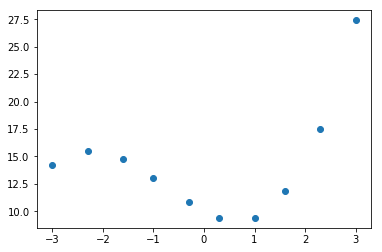

In [18]:
x = np.array([-3, -2.3, -1.6, -1, -0.3, 0.3, 1, 1.6, 2.3, 3])
y = np.array([14.2, 15.5, 14.8, 13., 10.8, 9.4, 9.4, 11.8, 17.5, 27.4])

# 绘制拟合曲线
plt.scatter(x, y)
plt.show()

> **步骤2：选择合适的高阶曲线，并生成对应的扩展矩阵**  
* 这些数据点显然无法用直线拟合。但可以考虑高阶曲线拟合，例如：$ y = w_3 x^3 + w_2 x^2 + w_1 x + w_0 $   
* 高阶曲线不是线性的，因此不能直接通过线性方法来高效求解。但是可以在对数据进行变换后，可以将高阶转换成一阶多元(维度)，从而进行线性处理。  
* 将原来的一元三阶变量转换成三元一阶矩阵(考虑到追加一个全为1的列，实际上有4个列)，此时的拟合曲线变为：$y = w_3 x_3 + w_2 x_2 + w_1 x_1 + w_0$  
上式中的$x_3, x_2, x_1$都是一阶变量，其中$x_3$相当于原先的$x^3$,$x_2$相当于原先的$x^2$,$x_1$相当于原先的$x^1$   
* 设：$ \begin{matrix} \\
X=\left(\begin{matrix}
x_1^n & x_1^{n-1} & \cdots & x_1 & 1 \\
x_2^n & x_2^{n-1} & \cdots & x_2 & 1 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
x_m^n & x_m^{n-1} & \cdots & x_m & 1
\end{matrix}\right) \\
\end{matrix}$；
$w=[w_n,\cdots,w_1,w_0]$  
接下来就可按照$Xw$线性方法求解

In [19]:
''' 生成扩展矩阵 '''

def make_x_ext(x_org):
    x_ext = np.c_[x_org[:,np.newaxis], np.ones(len(x_org))]         # 追加全1列
    x_ext = np.insert(x_ext, 0, np.power(x_org, 2), axis=1)     # 插入x*x数据列
    x_ext = np.insert(x_ext, 0, np.power(x_org, 3), axis=1)     # 插入x*x*x数据列
    return x_ext

X = make_x_ext(x)
print(X)

[[-2.7000e+01  9.0000e+00 -3.0000e+00  1.0000e+00]
 [-1.2167e+01  5.2900e+00 -2.3000e+00  1.0000e+00]
 [-4.0960e+00  2.5600e+00 -1.6000e+00  1.0000e+00]
 [-1.0000e+00  1.0000e+00 -1.0000e+00  1.0000e+00]
 [-2.7000e-02  9.0000e-02 -3.0000e-01  1.0000e+00]
 [ 2.7000e-02  9.0000e-02  3.0000e-01  1.0000e+00]
 [ 1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00]
 [ 4.0960e+00  2.5600e+00  1.6000e+00  1.0000e+00]
 [ 1.2167e+01  5.2900e+00  2.3000e+00  1.0000e+00]
 [ 2.7000e+01  9.0000e+00  3.0000e+00  1.0000e+00]]


> **步骤3-方法1：使用矩阵运算求解多元一阶变量的最小二乘解**  
$ W=(X^T X)^{-1} X^T y $  
上式中，$X$为上述三元一阶矩阵(外加一个全为1的列)，$W$对应的是一个具有4个元素的向量

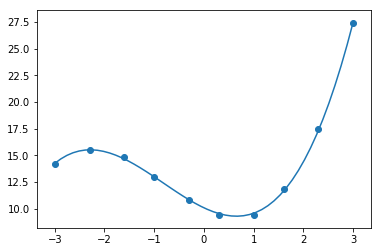

In [20]:
''' 使用矩阵算法拟合三阶曲线 '''

W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# 绘制拟合曲线
x_fit = np.linspace(-3, 3, 50)  # 给定一批x数据点
X_fit = make_x_ext(x_fit)       # 将其扩展为一阶矩阵
y_fit = np.dot(X_fit, W)        # 采用矩阵运算计算其拟合的结果
# 也可以采用下列方式计算拟合结果
# y_fit = W[0] * x_fit**3 + W[1] * x_fit**2 + W[2] * x_fit + W[3]
plt.plot(x_fit, y_fit)          # 作出拟合的曲线图

plt.scatter(x, y)               # 绘制原始数据点
plt.show()

> **步骤3-方法2：使用leastsq方法求解多元一阶变量的最小二乘解**

[ 0.49012809  1.20100243 -2.19801393 10.07080327]


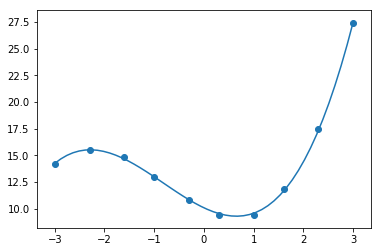

In [21]:
''' 使用leastsq方法拟合三阶曲线 '''

# 定义拟合函数
def fit_function(W, X):
    return np.dot(X, W)

# 定义残差函数
def error_function(W, X, y):
    return fit_function(W, X) - y

# 初始化权重参数
w_init = np.random.rand(4)
x_ext = make_x_ext(x)
# 传入残差函数(也就是目标函数)、初始值
# 将扩展矩阵和y值放在一个tuple参数中传入
result = opt.leastsq(error_function, w_init, args=(x_ext, y))
w = result[0]
print(w)            # 各个参数应该接近：0.5, 1.2, -2.3, 10

# 绘制拟合曲线
x_fit = np.linspace(-3, 3, 50)
x_fit_ext = make_x_ext(x_fit)
y_fit = fit_function(w, x_fit_ext)
plt.plot(x_fit, y_fit)

plt.scatter(x, y)
plt.show()

### **案例3：多元高阶拟合**
对于有多个自变量，同时每个自变量又存在高阶的情形，基本方法仍然是将每个高阶变量转换成一个单独的新变量，然后形成相应的多元矩阵，最后使用leastsq方法进行最小二乘求解  
本案例使用的数据点样本来源于函数：$y=3x_1^2-5x_1 x_2+3x_2^2-8x_1-10x_2+6$ (加了一个随机的小扰动)

> **步骤1：查看空间曲面数据点(二元二阶)**
* 为了显示三维空间的数据点，需要使用mpl_toolkits.mplot3d.Axes3D

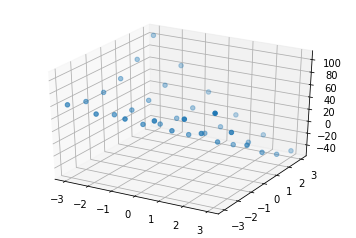

In [22]:
''' 查看三位空间数据点 '''
from mpl_toolkits.mplot3d import Axes3D  

# 用于生成样本数据点的函数 
def f(x1, x2):
    # np.random.random()是为了给样本数据一个小的扰动
    return 3 * x1 * x1 - 5 * x1 * x2 + 2 * x2 * x2 - 8 * x1 - 10 * x2 + 6 + np.random.random()

# 给定一批原始数据点的x1和x2两个方向坐标
x1 = np.linspace(-3, 3, 6)
x2 = np.linspace(-3, 3, 6)
y = np.zeros(len(x1) * len(x2))
# 根据x1和x2中的每个组合，分别计算对应的y值
y_index = 0
for i in np.arange(len(x1)):
    for j in np.arange(len(x2)):
        y[y_index] = f(x1[i], x2[j])
        y_index += 1

# 在三维空间绘制图像
ax = plt.figure().add_subplot(111, projection='3d')  
x_grid = np.meshgrid(x1, x2)
ax.scatter(x_grid[0], x_grid[1], y)                             # 绘制散点

plt.show()

> **步骤2：生成多元矩阵**

In [23]:
POLY_COUNT = 6                  # 2阶多项式一共6项
def map_data(X1, X2):           # 生成两个变量的多元一阶矩阵
    variables = np.ones((len(X1) * len(X2), POLY_COUNT))
    y = np.zeros((len(X1) * len(X2)))
    row_index = 0
    for i in np.arange(len(X1)):
        for j in np.arange(len(X2)):
            row = variables[row_index]
            row[0] = X1[i] * X1[i]
            row[1] = X1[i] * X2[j]
            row[2] = X2[j] * X2[j]
            row[3] = X1[i]
            row[4] = X2[j]
            y[row_index] = f(X1[i], X2[j])
            #row[5] = 1
            row_index += 1
    return (variables, y)

# 生成扩展矩阵及对应的y值
x_ext, y = map_data(x1, x2)
print(x_ext)

[[ 9.    9.    9.   -3.   -3.    1.  ]
 [ 9.    5.4   3.24 -3.   -1.8   1.  ]
 [ 9.    1.8   0.36 -3.   -0.6   1.  ]
 [ 9.   -1.8   0.36 -3.    0.6   1.  ]
 [ 9.   -5.4   3.24 -3.    1.8   1.  ]
 [ 9.   -9.    9.   -3.    3.    1.  ]
 [ 3.24  5.4   9.   -1.8  -3.    1.  ]
 [ 3.24  3.24  3.24 -1.8  -1.8   1.  ]
 [ 3.24  1.08  0.36 -1.8  -0.6   1.  ]
 [ 3.24 -1.08  0.36 -1.8   0.6   1.  ]
 [ 3.24 -3.24  3.24 -1.8   1.8   1.  ]
 [ 3.24 -5.4   9.   -1.8   3.    1.  ]
 [ 0.36  1.8   9.   -0.6  -3.    1.  ]
 [ 0.36  1.08  3.24 -0.6  -1.8   1.  ]
 [ 0.36  0.36  0.36 -0.6  -0.6   1.  ]
 [ 0.36 -0.36  0.36 -0.6   0.6   1.  ]
 [ 0.36 -1.08  3.24 -0.6   1.8   1.  ]
 [ 0.36 -1.8   9.   -0.6   3.    1.  ]
 [ 0.36 -1.8   9.    0.6  -3.    1.  ]
 [ 0.36 -1.08  3.24  0.6  -1.8   1.  ]
 [ 0.36 -0.36  0.36  0.6  -0.6   1.  ]
 [ 0.36  0.36  0.36  0.6   0.6   1.  ]
 [ 0.36  1.08  3.24  0.6   1.8   1.  ]
 [ 0.36  1.8   9.    0.6   3.    1.  ]
 [ 3.24 -5.4   9.    1.8  -3.    1.  ]
 [ 3.24 -3.24  3.24  1.8 

> **步骤3：使用leastsq求取最优解**

In [24]:
# 定义拟合函数(使用扩展矩阵的形式)
# 此处的X_ext必须是已经形成x1*x1, x1*x2，x2*x2,x1,x2,1共6列的数据矩阵
def fit_function(W, X_ext):
    return np.dot(X_ext, W)

# 定义残差函数(使用扩展矩阵的形式)
# 此处的X_ext必须是已经形成x1*x1, x1*x2，x2*x2,x1,x2,1共6列的数据矩阵
def error_function(W, X_ext, y):
    return fit_function(W, X_ext) - y

w_init = np.random.randn(POLY_COUNT)            # 初始化w
result = opt.leastsq(error_function, w_init, args=(x_ext, y))

w = result[0]
print(w)                # 拟合参数应接近：[  3.  -5.   2.  -8. -10.   6.]

[ 3.01365394 -4.97961967  1.98709079 -8.01447328 -9.97794902  6.48308589]


> **步骤4：作图查看拟合效果**

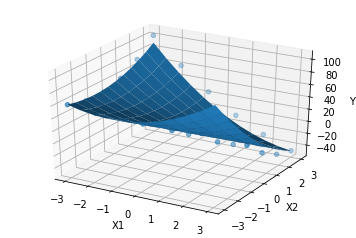

In [25]:
# 下列函数利用拟合出来的W参数对新的X1和X2数据进行计算
def predict_function(W, X1, X2):
    return W[0] * X1 * X1 + W[1] * X1 * X2 + W[2] * X2 * X2 + W[3] * X1 + W[4] * X2 + W[5]

# 在三维空间绘制图像
ax = plt.figure().add_subplot(111, projection='3d')  
x_grid = np.meshgrid(x1, x2)
ax.scatter(x_grid[0], x_grid[1], y)                             # 绘制散点

# 使用拟合函数计算曲面上的点阵
x1_fit = np.linspace(-3, 3, 12)
x2_fit = np.linspace(-3, 3, 12)
x_fit_grid = np.meshgrid(x1_fit, x2_fit)
y_fit = predict_function(w, x_fit_grid[0], x_fit_grid[1])
ax.plot_surface(x_fit_grid[0], x_fit_grid[1], y_fit)            # 绘制曲面

ax.set_xlabel('X1')  
ax.set_ylabel('X2')  
ax.set_zlabel('Y')
plt.show()